<a href="https://colab.research.google.com/github/Igor999dev/mushroom/blob/main/MVP_Cogumelo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **O Problema da Identificação de Cogumelos Comestíveis e Venenosos**
### **Aluno:** Igor Klippel Campos
### **MVP (Produto Mínimo Viável) do Sprint:** Machine Learning & Analytics (40530010163_20240_01)

# Introdução

A humanidade tem uma história próxima dos cogumelos desde a pré-história, eles são utilizados para alimentação, medicina natural e para fins recreativos/alucinógenos.


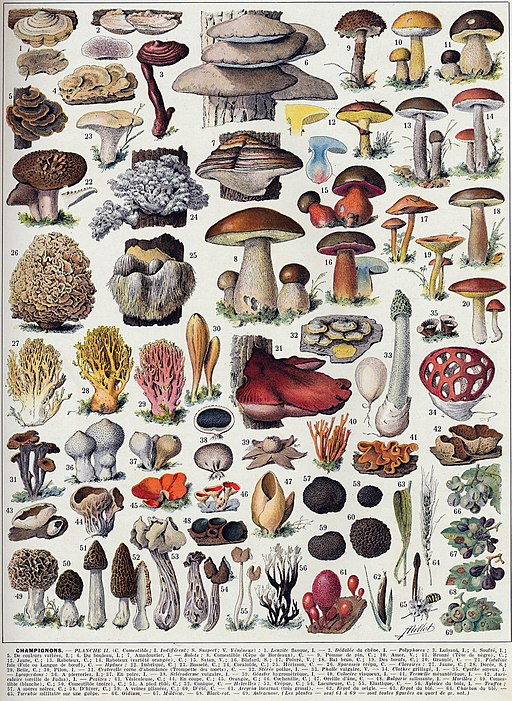

*Fonte da imagem: Champignons-couleurs 2 - Mushrooms colour plate 01. Ilustração em domínio público do Larousse du XXème siècle (1932), disponível no Wiki Commons.*

Os cogumelos são corpos frutíferos de fungos, organismos essenciais no equilíbrio ecológico, pois são decompositores de materiais orgânicos. Presentes em diversos habitats, variam em formas, cores e tamanhos. Na alimentação, destacam-se por seu sabor e valor nutricional, sendo ricos em proteínas, fibras, vitaminas e minerais. Alguns têm propriedades medicinais, sendo usados na fitoterapia e na pesquisa farmacêutica. Outros, como os cogumelos alucinógenos, contêm compostos psicoativos com potencial terapêutico e recreativo. Apesar de sua utilidade, algumas espécies são tóxicas ou venenosas, exigindo conhecimento para consumo seguro. Em muitas culturas, simbolizam elementos da natureza, como o ciclo natural, a reutilização de matéria decomposta e a abertura de novas percepções por meio de suas propriedades alucinógenas, entre outros.



---


**O problema** que a humanidade enfrenta com o consumo de cogumelos é a dificuldade de distinguir entre os comestíveis e os tóxicos, já que não existe uma regra precisa para diferenciá-los. Por isso, o uso de aprendizado de máquina surge como uma solução promissora.

**O objetivo** deste notebook e deste MVP (Produto Mínimo Viável) é utilizar técnicas de aprendizado de máquina para resolver o problema de classificação binária de cogumelos comestíveis e venenosos.


**Hipótese:** É possível classificar cogumelos como comestíveis ou tóxicos com uma precisão acima de 95%, utilizando algoritmos de aprendizado de máquina treinados em características físicas e visuais dos cogumelos. A performance do modelo será avaliada por meio de métricas como acurácia, precision, recall, matriz de confusão e relatório de classificação, buscando resultados consistentes e confiáveis.


# O Banco de Dados

Para criar um modelo de aprendizado de máquina para classificação de cogumelos será utilizado um banco de dados cedido pelo UCI Machine Learning Repository este conjunto de dados contém descrições de amostras hipotéticas correspondentes a 23 espécies de cogumelos, pertencentes às famílias Agaricus e Lepiota. Cada espécie foi classificada como definitivamente comestível, definitivamente venenosa ou de comestibilidade desconhecida e não recomendada. As espécies desta última categoria foram agrupadas junto com as venenosas. O guia que acompanha os dados enfatiza que não existe uma regra simples para determinar se um cogumelo é comestível ou não.

**Condição:**
*   Os cogumelos classificados como "comestibilidade desconhecida"
foram agrupados com os "definitivamente venenosos" na categoria de não-comestíveis.
*   As duas classes estão balanceadas.

**Restrições:**
*   As variáveis do dataset são categóricas, exigindo pré-processamento.
*   O dataset representa apenas cogumelos encontrados em ambientes específicos, podendo não ser generalizável globalmente.
*   A ausência de dados relacionados ao habitat pode limitar a aplicabilidade do modelo em situações reais.



---



Em seguida, vamos importar as bibliotecas necessárias, carregar o dataset e realizar uma pré-análise.

In [ ]:
# Importando as Bibliotecas Necessárias

import pandas as pd # Manipulação de dados
import numpy as np # Cálculos numéricos
import matplotlib.pyplot as plt # Criação de gráficos
import seaborn as sns # Visualização de dados avançada
import warnings # Controle de avisos
warnings.filterwarnings('ignore')

# Ferramentas para pré-processamento dos dados
from sklearn.model_selection import train_test_split  # Divisão dos dados em treino e teste
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler # Codificação de rótulos e padronização
from sklearn.model_selection import KFold


# Modelos de classificação
from sklearn.linear_model import LogisticRegression # Regressão Logística
from sklearn.svm import SVC # Support Vector Machine (SVM)
from sklearn.ensemble import RandomForestClassifier # Random Forest
from sklearn.ensemble import GradientBoostingClassifier # Gradient Boosting Machines (GBM)
from sklearn.neighbors import KNeighborsClassifier # K-Nearest Neighbors (KNN)
from sklearn.naive_bayes import GaussianNB # Naive Bayes

#from sklearn.model_selection import cross_val_score
#from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import GridSearchCV
#from sklearn.model_selection import RandomizedSearchCV

# Ferramentas para avaliação do modelo
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score  # Relatório de classificação, matriz de confusão e acurácia

In [ ]:
# Importando o dataset
url = 'https://raw.githubusercontent.com/Igor999dev/mushroom/refs/heads/main/agaricus-lepiota.data'

# Lista de colunas (baseada no arquivo .names)
columns = ['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
           'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
           'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
           'stalk-surface-below-ring', 'stalk-color-above-ring',
           'stalk-color-below-ring', 'veil-type', 'veil-color',
           'ring-number', 'ring-type', 'spore-print-color',
           'population', 'habitat']

# Lendo o arquivo
df = pd.read_csv(url, names=columns)

# Visualizar as primeiras linhas
df.head(10)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
5,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g
6,e,b,s,w,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,n,m
7,e,b,y,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,s,m
8,p,x,y,w,t,p,f,c,n,p,...,s,w,w,p,w,o,p,k,v,g
9,e,b,s,y,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,s,m


In [ ]:
# Resumo estatístico
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [ ]:
# Checar informações básicas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [ ]:
# Verificar valores ausentes
print(df.isnull().sum())

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64


In [ ]:
value_counts = df['stalk-root'].value_counts()
print(value_counts)

stalk-root
b    3776
?    2480
e    1120
c     556
r     192
Name: count, dtype: int64


# O Modelo

In [ ]:
# Separar X e y
X = df.drop('class', axis=1) # assumindo que a coluna 'class' é o alvo
y = df['class']

X.head()
y.head()

# Dividindo o dataset em treino e teste:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=9)

# Inicializar o OneHotEncoder
encoder = OneHotEncoder(drop='first', sparse_output=False)  # 'drop="first"' para evitar a multicolinearidade

# Ajuste e transformação das variáveis categóricas
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.fit_transform(y_test)

num_particoes = 10 # número de folds da validação cruzada
kfold = KFold(n_splits=num_particoes, shuffle=True, random_state=7) # faz o particionamento em 10 folds

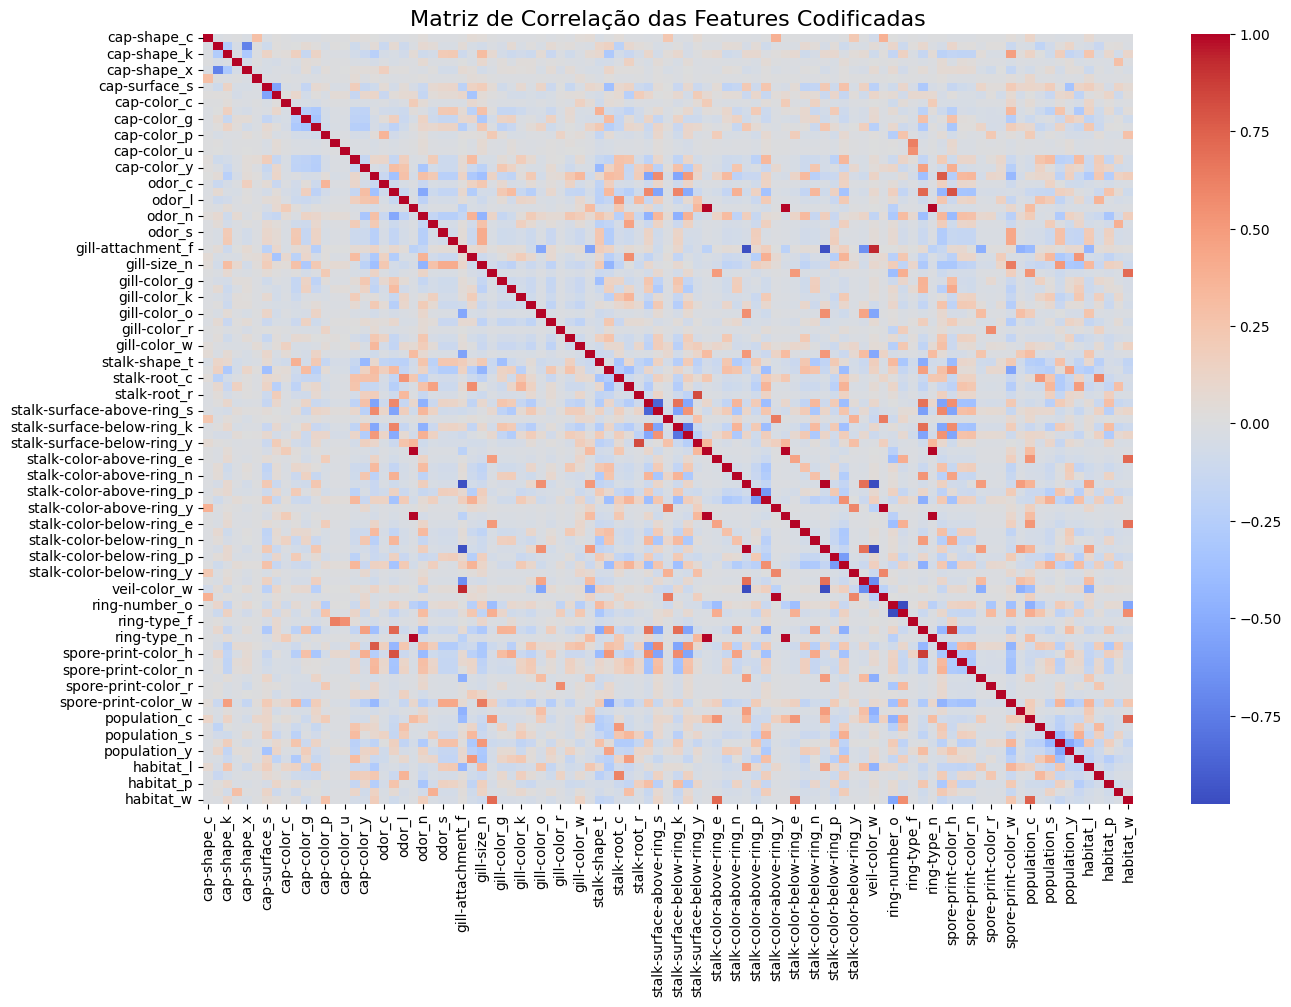

In [ ]:
# Converter o resultado do OneHotEncoder em DataFrame
X_train_df = pd.DataFrame(X_train, columns=encoder.get_feature_names_out())
X_test_df = pd.DataFrame(X_test, columns=encoder.get_feature_names_out())

# Calcular a matriz de correlação
correlation_matrix = X_train_df.corr()

# Criar o heatmap
plt.figure(figsize=(15, 10))  # Ajustar o tamanho do gráfico
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', cbar=True)
plt.title("Matriz de Correlação das Features Codificadas", fontsize=16)
plt.show()
# filtrar as mais relevantes + - 0,5
# plotar em grupos

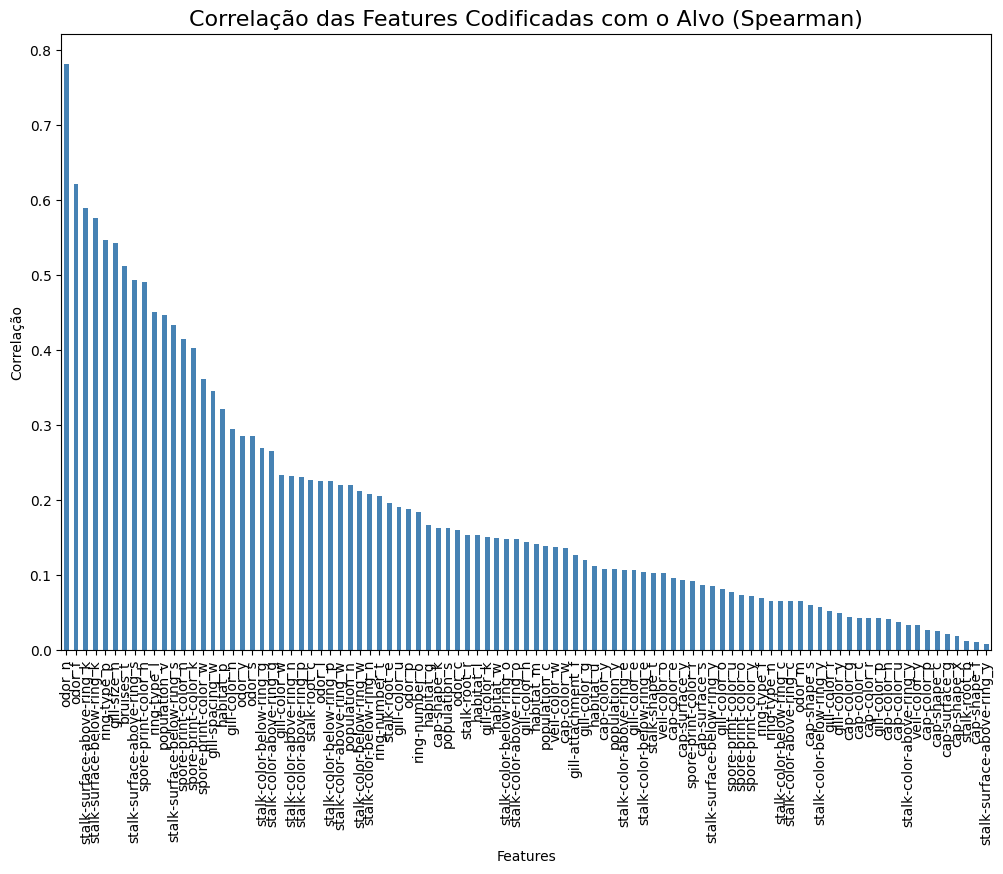

In [ ]:
# Adicionar y_train ao DataFrame de X_train para análise conjunta
X_train_df['target'] = y_train

# Calcular correlação entre cada feature e o alvo usando Spearman
correlation_with_target = X_train_df.corr(method='spearman')['target'].drop('target')

# Ordenar as correlações por magnitude (absoluto)
correlation_with_target = correlation_with_target.abs().sort_values(ascending=False)

# Plotar as correlações
plt.figure(figsize=(12, 8))
correlation_with_target.plot(kind='bar', color='steelblue')
plt.title("Correlação das Features Codificadas com o Alvo (Spearman)", fontsize=16)
plt.ylabel("Correlação")
plt.xlabel("Features")
plt.show()


In [ ]:
# Inicializando os modelos
models = {
    'Logistic Regression': LogisticRegression(),
    'SVM': SVC(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'KNN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB()
}

# Dicionário para armazenar os resultados
results = {}

In [ ]:
# Treinando e avaliando cada modelo
for name, model in models.items():
    # Treinando o modelo
    model.fit(X_train, y_train)

    # Fazendo previsões no conjunto de teste
    y_pred = model.predict(X_test)

    # Avaliando o modelo
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)

    # Salvando os resultados
    results[name] = {
        'Accuracy': accuracy,
        'Confusion Matrix': conf_matrix,
        'Classification Report': class_report
    }

    # Exibindo os resultados
    print(f"Modelo: {name}")
    print(f"Acurácia: {accuracy:.4f}")
    print(f"Matriz de Confusão:\n{conf_matrix}")
    print(f"Relatório de Classificação:\n{class_report}")
    print("-" * 50)

Modelo: Logistic Regression
Acurácia: 1.0000
Matriz de Confusão:
[[875   0]
 [  0 750]]
Relatório de Classificação:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       875
           1       1.00      1.00      1.00       750

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

--------------------------------------------------
Modelo: SVM
Acurácia: 1.0000
Matriz de Confusão:
[[875   0]
 [  0 750]]
Relatório de Classificação:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       875
           1       1.00      1.00      1.00       750

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

--------------------------------------------------
Modelo: Random Forest
Acurác

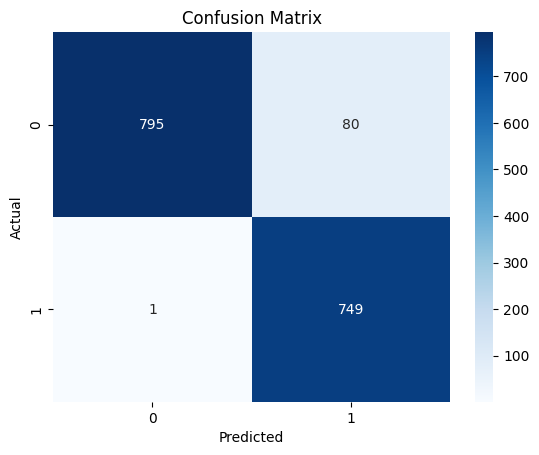

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
'''
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Melhor modelo
print("Melhores parâmetros:", grid_search.best_params_)
'''

'\nparam_grid = {\n    \'n_estimators\': [100, 200, 300],\n    \'max_depth\': [None, 10, 20, 30],\n    \'min_samples_split\': [2, 5, 10]\n}\n\ngrid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring=\'accuracy\')\ngrid_search.fit(X_train, y_train)\n\n# Melhor modelo\nprint("Melhores parâmetros:", grid_search.best_params_)\n'

# Conclusão